In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from typhon.plots.maps import get_cfeatures_at_scale
import cartopy.crs as ccrs
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/opt/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def plot_file(casename, experiment=0):
    if casename == 'allCFCs':
        physics_id = 1
    elif casename == 'allCFCs_LM':
        physics_id = 2
    else:
        raise runtime_error('unknown case')
    fig = plt.figure(figsize=[20, 15])

    subcases = ['rld', 'rlu']
    for axid, subcase in enumerate(subcases):
        ax = plt.subplot(len(subcases), 1, axid+1,
                         projection=ccrs.PlateCarree())
        features = get_cfeatures_at_scale(scale='50m')
        ax.add_feature(features.BORDERS)
        ax.add_feature(features.COASTLINE)
        filename = f'Efx_ARTS-2-3_rad-irf_20190319/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f1_gn.nc'
        with Dataset(filename, 'r') as ds:
            cax = ax.scatter(ds['lon'][:], ds['lat'][:],
                             s=180, c=ds[subcase][:][experiment, :, -1], cmap='temperature')
        plt.title(f'{subcase} {casename} {filename}')
        plt.colorbar(cax, ax=ax)

In [3]:
def plot_file_compare(casename, experiment=0):
    if casename == 'allCFCs':
        physics_id = 1
    elif casename == 'allCFCs_LM':
        physics_id = 2
    else:
        raise runtime_error('unknown case')
    fig = plt.figure(figsize=[20, 15])

    subcases = ['rld', 'rlu']
    for axid, subcase in enumerate(subcases):
        ax = plt.subplot(len(subcases), 1, axid+1,
                         projection=ccrs.PlateCarree())
        features = get_cfeatures_at_scale(scale='50m')
        ax.add_feature(features.BORDERS)
        ax.add_feature(features.COASTLINE)
        filename = f'Efx_ARTS-2-3_rad-irf_20190319/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f1_gn.nc'
        filename_old = f'Efx_ARTS-2-3_rad-irf_20190409/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f1_gn.nc'
        with Dataset(filename, 'r') as ds, Dataset(filename_old, 'r') as ds_old:
            cax = ax.scatter(ds['lon'][:], ds['lat'][:],
                             s=180, c=ds[subcase][:][experiment, :, -1]-ds_old[subcase][:][experiment, :, -1], cmap='temperature')
            print(ds['plev'][:][0, -1])
        plt.title(f'{subcase} {casename} {filename}')
        plt.colorbar(cax, ax=ax)

In [4]:
# inpath = 'Efx_ARTS-2-3_rad-irf_20190319'
inpath = 'Efx_ARTS-2-3_rad-irf_20190409'
for subcase in ['rld', 'rlu']:
    with Dataset(f'{inpath}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p1f1_gn.nc', 'r') as ds:
        allcfcs = ds[subcase][:]
    with Dataset(f'{inpath}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p2f1_gn.nc', 'r') as ds:
        allcfcslm = ds[subcase][:]
    print(subcase, 'diff:', np.max(allcfcs - allcfcslm))

rld diff: 1.0576172
rlu diff: 0.06726074


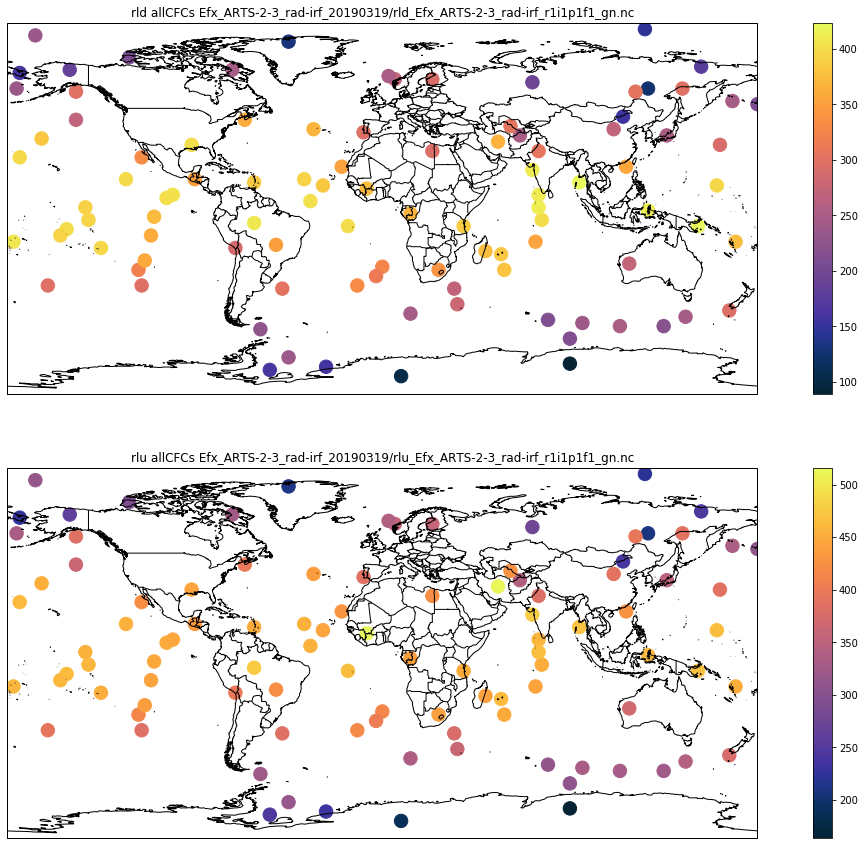

In [5]:
plot_file('allCFCs', 0)

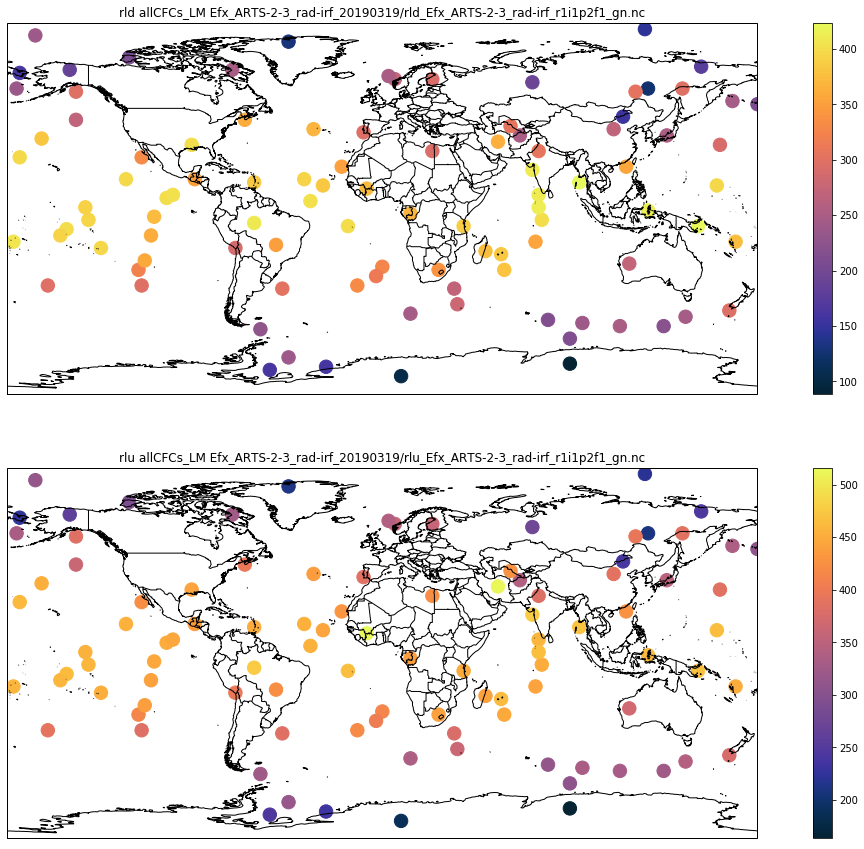

In [6]:
plot_file('allCFCs_LM', 0)

In [ ]:
for i in range(18):
    plot_file_compare('allCFCs', i)
    plt.savefig(f'allCFCs_{(i+1):02d}.pdf')
for i in range(18):
    plot_file_compare('allCFCs_LM', i)
    plt.savefig(f'allCFCs_LM_{(i+1):02d}.pdf')